In [260]:
import numpy as np
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt

# Store in variables: (X_train, Y_train)
x = loadmat("ml_features.mat")
X_train = x['ml_features']
X_train = np.asarray(X_train)

y = loadmat("ground_truth_angles.mat")   
Y_train = y['ground_truth_angles']
Y_train = np.asarray(Y_train)

print(X_train.shape)
print(Y_train.shape)

(1, 381, 1, 14440)
(14440, 1)


In [89]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

In [23]:
print(X_train[0,0:10,0,10000])

[0.24556304 0.28215316 0.00508284 0.07216061 0.02789245 0.01498903
 0.17195057 0.07480475 0.06527091 0.01207503]


In [109]:
print(y_train.shape)
print(x_train.shape)
print(y_val)
print(x_val.shape)

(60000,)
(60000, 28, 28)
[9 2 1 ... 8 1 5]
(10000, 28, 28)


In [126]:
x_t = np.empty(shape=(11552,381),dtype='float')
y_t = np.empty(shape=(11552,1),dtype='float')

x_v = np.empty(shape=(2888,381),dtype='float')
y_v = np.empty(shape=(2888,1),dtype='float')

x = np.linspace(0,14439, 14440, dtype=int)
count = int(0)
for i in x:
    if i%5 == 0:
        b = int(i/5)
        x_v[b,:] = X_train[:,:,:,i].flatten()
        y_v[b] = Y_train[i]
        count = count + 1
    else:
        x_t[i-count,:] = X_train[:,:,:,i].flatten()
        y_t[i-count] = Y_train[i]
y_v = y_v.flatten()
y_t = y_t.flatten()

array([[0.24683183, 0.01130645, 0.09186298, ..., 2.73436847, 2.90709381,
        2.65551121],
       [0.08281495, 0.4975328 , 0.08912373, ..., 2.95651174, 3.11839639,
        2.67945538],
       [0.0719951 , 0.73640633, 0.25283418, ..., 2.85219694, 2.96125965,
        2.7224627 ],
       ...,
       [0.49526889, 0.80047103, 0.06788202, ..., 3.05764663, 2.74101767,
        2.80971202],
       [0.38503754, 0.62898475, 0.40623406, ..., 2.87325131, 2.44302671,
        2.75898348],
       [0.31151163, 0.15611525, 0.12495698, ..., 3.07398956, 2.55133668,
        3.07083109]])

In [137]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 3.1415920147494263
  y = tf.cast(y, tf.int64)

  return x, y

def create_dataset(xs, ys, n_classes=360):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [207]:
model = keras.Sequential([
    keras.layers.Dense(units=381, input_shape=(381,), activation='relu'),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=200, activation='relu'),
    keras.layers.Dense(units=360, activation='softmax')
])

In [249]:
model = keras.Sequential([
    keras.layers.Dense(units=381, input_shape=(381,), activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(units=127, activation='relu'),
    keras.layers.Dense(units=720, activation='relu'),
    keras.layers.Dense(units=360, activation='linear')
])

In [250]:
train_dataset = create_dataset(x_t, y_t)
val_dataset = create_dataset(x_v, y_v)


In [252]:

model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=300,
    validation_data=val_dataset.repeat(), 
    validation_steps=5
)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 5.1043 - accuracy: 0.0154 - val_loss: 3.5303 - val_accuracy: 0.0844
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 3.3898 - accuracy: 0.0848 - val_loss: 2.8781 - val_accuracy: 0.1203
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 2.9105 - accuracy: 0.1238 - val_loss: 2.6793 - val_accuracy: 0.1453
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 2.6768 - accuracy: 0.1527 - val_loss: 2.4771 - val_accuracy: 0.1484
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 2.5332 - accuracy: 0.1813 - val_loss: 2.3839 - val_accuracy: 0.1844
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 2.4122 - accuracy: 0.2079 - val_loss: 2.2486 - val_accuracy: 0.2141
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 2.3176 - accuracy: 0.2224 - val_loss: 2.2770 - val_accuracy: 0.2250
Epoch 

In [253]:
from sklearn.linear_model import LinearRegression

logreg = LinearRegression()
logreg.fit(x_t, y_t)

print('Accuracy of Linear regression classifier on training set: {:.2f}'
     .format(logreg.score(x_t, y_t)))
print('Accuracy of Linear regression classifier on test set: {:.2f}'
     .format(logreg.score(x_v, y_v)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.96


In [204]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_t, y_t)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_t, y_t)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_v, y_v)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.55


In [258]:
feature_comp_matrix = np.empty((381,381), dtype=float)
x = np.linspace(0,380, 381, dtype=int)
for r in x:
    for c in x:
        feature_comp_matrix[r,c] = np.linalg.norm(x_t[:,r]-x_t[:,c])


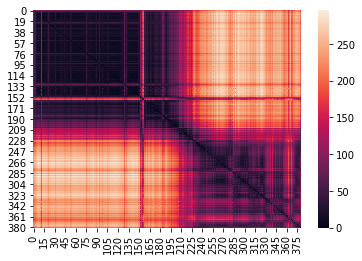

In [263]:
import seaborn as sns
ax = sns.heatmap(feature_comp_matrix)